Les propositions suivantes illustrent des propriétés fondamentales des ensembles ouverts en analyse réelle. Chaque graphique visualise une de ces propriétés à travers des exemples concrets.
    propositions illustrées :
1.     Toute boule ouverte est un ouvert (Notion de "Marge de sécurité")
2.     L'intersection FINIE d'ouverts est un ouvert (On prend le min des marges)
3.     L'intersection INFINIE d'ouverts n'est pas forcément un ouvert (Exemple: ]-1/n, 1/n[)


In [6]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle, Rectangle
import seaborn as sns

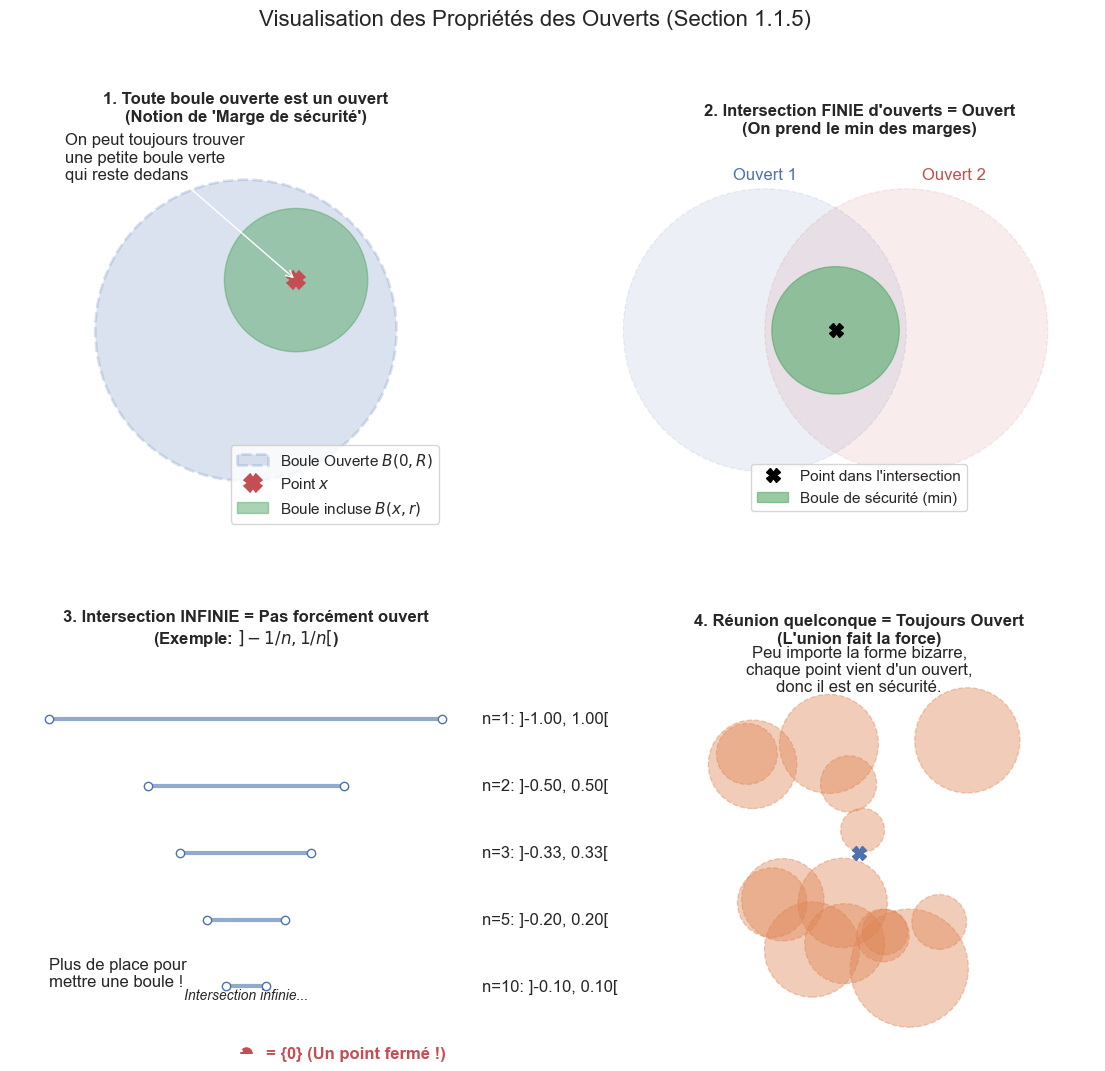

In [5]:
def plot_open_sets_concepts():
    # Configuration du style Seaborn
    sns.set_theme(style="white")
    colors = sns.color_palette("deep")

    # Attribution des couleurs de la palette Seaborn
    c_blue = colors[0]
    c_orange = colors[1]
    c_green = colors[2]
    c_red = colors[3]

    fig, axes = plt.subplots(2, 2, figsize=(14, 12))
    plt.subplots_adjust(hspace=0.3, wspace=0.3)

    # ---------------------------------------------------------
    # GRAPH 1 : Une boule ouverte est un ouvert (La marge de sécurité)
    # ---------------------------------------------------------
    ax1 = axes[0, 0]
    ax1.set_title("1. Toute boule ouverte est un ouvert\n(Notion de 'Marge de sécurité')", fontsize=12, fontweight='bold')
    ax1.set_xlim(-2, 2)
    ax1.set_ylim(-2, 2)
    ax1.set_aspect('equal')
    ax1.axis('off')

    # La boule principale (ouverte = bord pointillé)
    main_ball = Circle((0, 0), 1.5, edgecolor=c_blue, facecolor=c_blue, alpha=0.2, linestyle='--', linewidth=2, label='Boule Ouverte $B(0, R)$')
    ax1.add_patch(main_ball)

    # Un point x quelconque
    point_x = np.array([0.5, 0.5])
    ax1.plot(point_x[0], point_x[1], marker='X', color=c_red, markersize=10, markeredgewidth=3, linestyle='None', label='Point $x$')

    # Calcul de la distance au bord et tracé de la petite boule
    dist_to_edge = 1.5 - np.sqrt(point_x[0]**2 + point_x[1]**2)
    safety_ball = Circle(point_x, dist_to_edge*0.9, color=c_green, alpha=0.5, label='Boule incluse $B(x, r)$')
    ax1.add_patch(safety_ball)

    # Annotation
    ax1.annotate('On peut toujours trouver\nune petite boule verte\nqui reste dedans', xy=(point_x[0], point_x[1]), xytext=(-1.8, 1.5),
                 arrowprops=dict(facecolor='black', arrowstyle='->'))
    ax1.legend(loc='lower right')


    # ---------------------------------------------------------
    # GRAPH 2 : Intersection Finie (Le min des rayons)
    # ---------------------------------------------------------
    ax2 = axes[0, 1]
    ax2.set_title("2. Intersection FINIE d'ouverts = Ouvert\n(On prend le min des marges)", fontsize=12, fontweight='bold')
    ax2.set_xlim(-2, 3)
    ax2.set_ylim(-2, 2)
    ax2.set_aspect('equal')
    ax2.axis('off')

    # Deux ouverts qui se coupent
    c1 = Circle((-0.5, 0), 1.5, edgecolor=c_blue, facecolor=c_blue, alpha=0.1, linestyle='--')
    c2 = Circle((1.0, 0), 1.5, edgecolor=c_red, facecolor=c_red, alpha=0.1, linestyle='--')
    ax2.add_patch(c1)
    ax2.add_patch(c2)

    # Point dans l'intersection
    p_inter = np.array([0.25, 0])
    ax2.plot(p_inter[0], p_inter[1], marker='X', color='black', markersize=10, linestyle='None', label='Point dans l\'intersection')

    # Rayons vers les bords
    # Distance au bord bleu (centre -0.5)
    d1 = 1.5 - np.sqrt((p_inter[0] - (-0.5))**2)
    # Distance au bord rouge (centre 1.0)
    d2 = 1.5 - np.sqrt((p_inter[0] - 1.0)**2)
    r_safe = min(d1, d2) * 0.9

    # Petite boule de sécurité
    safe_circle = Circle(p_inter, r_safe, color=c_green, alpha=0.6, label='Boule de sécurité (min)')
    ax2.add_patch(safe_circle)

    ax2.text(-0.5, 1.6, "Ouvert 1", color=c_blue, ha='center')
    ax2.text(1.5, 1.6, "Ouvert 2", color=c_red, ha='center')
    ax2.legend(loc='lower center')


    # ---------------------------------------------------------
    # GRAPH 3 : Intersection Infinie (Le Piège)
    # ---------------------------------------------------------
    ax3 = axes[1, 0]
    ax3.set_title("3. Intersection INFINIE = Pas forcément ouvert\n(Exemple: $]-1/n, 1/n[$)", fontsize=12, fontweight='bold')
    ax3.set_xlim(-1.2, 1.2)
    ax3.set_ylim(0, 6)
    ax3.axis('off')

    # Dessiner les intervalles qui rétrécissent
    ns = [1, 2, 3, 5, 10]
    for i, n in enumerate(ns):
        y_pos = 5 - i
        # Ligne de l'intervalle
        ax3.plot([-1/n, 1/n], [y_pos, y_pos], color=c_blue, linewidth=3, alpha=0.6)
        # Bornes ouvertes (crochets ou cercles vides)
        ax3.plot(-1/n, y_pos, marker='o', color='white', markeredgecolor=c_blue, linestyle='None')
        ax3.plot(1/n, y_pos, marker='o', color='white', markeredgecolor=c_blue, linestyle='None')
        ax3.text(1.2, y_pos, f"n={n}: ]{-1/n:.2f}, {1/n:.2f}[", va='center')

    # La limite
    ax3.text(0, 0.8, "Intersection infinie...", ha='center', fontsize=10, style='italic')
    ax3.plot(0, 0, marker='o', color=c_red, markersize=8, linestyle='None', label='Point {0}')
    ax3.text(0.1, 0, "= {0} (Un point fermé !)", va='center', color=c_red, fontweight='bold')

    ax3.annotate('Plus de place pour\nmettre une boule !', xy=(0, 0), xytext=(-1, 1),
                 arrowprops=dict(facecolor=c_red, arrowstyle='->'))


    # ---------------------------------------------------------
    # GRAPH 4 : Réunion Quelconque
    # ---------------------------------------------------------
    ax4 = axes[1, 1]
    ax4.set_title("4. Réunion quelconque = Toujours Ouvert\n(L'union fait la force)", fontsize=12, fontweight='bold')
    ax4.set_xlim(0, 10)
    ax4.set_ylim(0, 10)
    ax4.set_aspect('equal')
    ax4.axis('off')

    # Générer plein de cercles aléatoires
    np.random.seed(42)
    for _ in range(15):
        x, y = np.random.uniform(2, 8, 2)
        r = np.random.uniform(0.5, 1.5)
        # Tous de la même couleur pour montrer qu'ils fusionnent
        c = Circle((x, y), r, color=c_orange, alpha=0.4, linestyle='--')
        ax4.add_patch(c)

    # Un point au hasard dedans
    p_union = np.array([5, 5])
    ax4.plot(p_union[0], p_union[1], marker='X', color=c_blue, markersize=10, linestyle='None', label='Point dans la réunion')

    # Annotation
    ax4.text(5, 9, "Peu importe la forme bizarre,\nchaque point vient d'un ouvert,\ndonc il est en sécurité.", ha='center')

    plt.suptitle("Visualisation des Propriétés des Ouverts (Section 1.1.5)", fontsize=16)
    plt.show()

plot_open_sets_concepts()

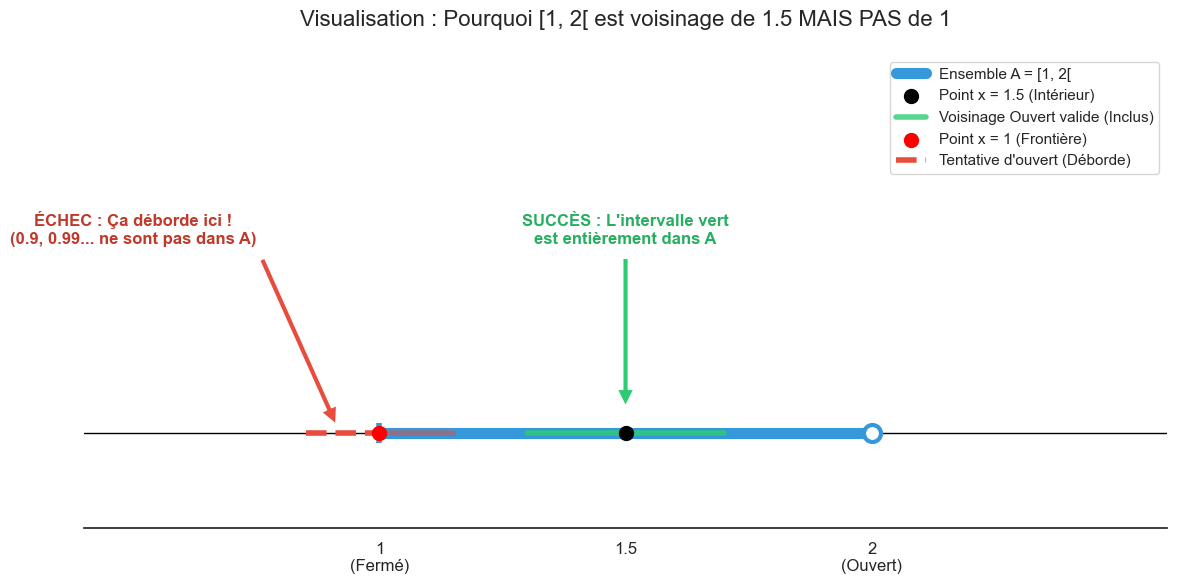

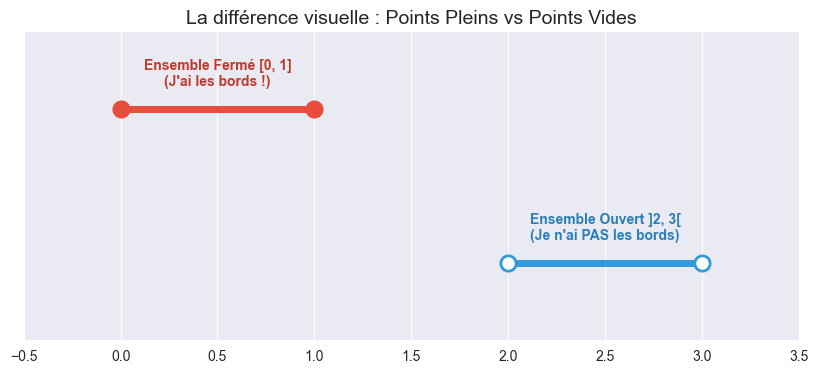

In [3]:
def visualiser_ouvert_ferme():
    fig, ax = plt.subplots(figsize=(10, 4))

    # Masquer les axes Y
    ax.get_yaxis().set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Limites
    ax.set_xlim(-0.5, 3.5)
    ax.set_ylim(-2, 2)

    # ------------------------------------------------
    # 1. Ensemble FERMÉ [0, 1]
    # ------------------------------------------------
    y_pos = 1
    # La barre
    ax.plot([0, 1], [y_pos, y_pos], color='#e74c3c', linewidth=5, label='Fermé [0, 1]')
    # Les points aux bouts (PLEINS)
    ax.plot(0, y_pos, 'o', color='#e74c3c', markersize=12) # Point inclus
    ax.plot(1, y_pos, 'o', color='#e74c3c', markersize=12) # Point inclus

    ax.text(0.5, y_pos + 0.3, "Ensemble Fermé [0, 1]\n(J'ai les bords !)",
            ha='center', color='#c0392b', fontweight='bold')

    # ------------------------------------------------
    # 2. Ensemble OUVERT ]2, 3[
    # ------------------------------------------------
    y_pos = -1
    # La barre
    ax.plot([2, 3], [y_pos, y_pos], color='#3498db', linewidth=5, label='Ouvert ]2, 3[')
    # Les points aux bouts (VIDES / BLANCS)
    ax.plot(2, y_pos, 'o', color='#3498db', markersize=12) # Contour
    ax.plot(2, y_pos, 'o', color='white', markersize=8)    # Intérieur vide

    ax.plot(3, y_pos, 'o', color='#3498db', markersize=12) # Contour
    ax.plot(3, y_pos, 'o', color='white', markersize=8)    # Intérieur vide

    ax.text(2.5, y_pos + 0.3, "Ensemble Ouvert ]2, 3[\n(Je n'ai PAS les bords)",
            ha='center', color='#2980b9', fontweight='bold')

    plt.title("La différence visuelle : Points Pleins vs Points Vides", fontsize=14)
    plt.show()

visualiser_ouvert_ferme()

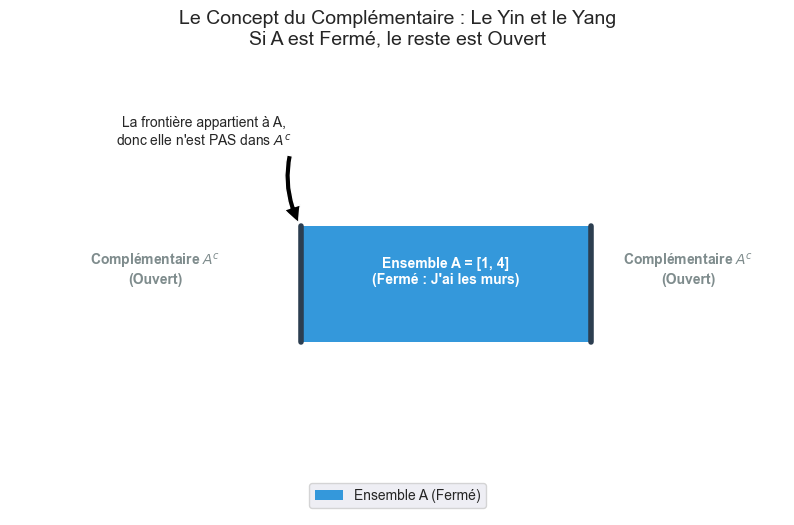

In [5]:
def visualiser_complementaire():
    fig, ax = plt.subplots(figsize=(10, 6))

    # Fond : Le complémentaire (L'Univers X)
    ax.set_facecolor('#ecf0f1') # Gris clair pour l'infini

    # Définition de la zone de dessin
    ax.set_xlim(-2, 6)
    ax.set_ylim(-2, 2)
    ax.axis('off')

    # ------------------------------------------------
    # L'Ensemble A = [1, 4] (FERMÉ)
    # ------------------------------------------------
    # On le représente par une zone centrale colorée
    rect = plt.Rectangle((1, -0.5), 3, 1, facecolor='#3498db', edgecolor='none', label='Ensemble A (Fermé)')
    ax.add_patch(rect)

    # Les Bords de A (Ligne SOLIDE = Appartient à A)
    ax.plot([1, 1], [-0.5, 0.5], color='#2c3e50', linewidth=4, linestyle='-')
    ax.plot([4, 4], [-0.5, 0.5], color='#2c3e50', linewidth=4, linestyle='-')

    ax.text(2.5, 0, "Ensemble A = [1, 4]\n(Fermé : J'ai les murs)", ha='center', color='white', fontweight='bold')

    # ------------------------------------------------
    # Le Complémentaire A^c (OUVERT)
    # ------------------------------------------------
    # C'est tout le reste (le fond gris)
    ax.text(-0.5, 0, "Complémentaire $A^c$\n(Ouvert)", ha='center', color='#7f8c8d', fontweight='bold')
    ax.text(5, 0, "Complémentaire $A^c$\n(Ouvert)", ha='center', color='#7f8c8d', fontweight='bold')

    # Annotation sur la frontière
    ax.annotate("La frontière appartient à A,\ndonc elle n'est PAS dans $A^c$",
                xy=(1, 0.5), xytext=(0, 1.2),
                arrowprops=dict(facecolor='black', shrink=0.05, connectionstyle="arc3,rad=0.2"),
                ha='center', fontsize=10)

    # Titre
    plt.title("Le Concept du Complémentaire : Le Yin et le Yang\nSi A est Fermé, le reste est Ouvert", fontsize=14)
    plt.legend(loc='lower center', ncol=2)
    plt.show()

visualiser_complementaire()

Si dessus nous avons visualisé les ensembles ouverts et fermés, ainsi que le concept de complémentaire. Maintenant, nous allons illustrer les lois de De Morgan pour les ensembles à l'aide de diagrammes de Venn.

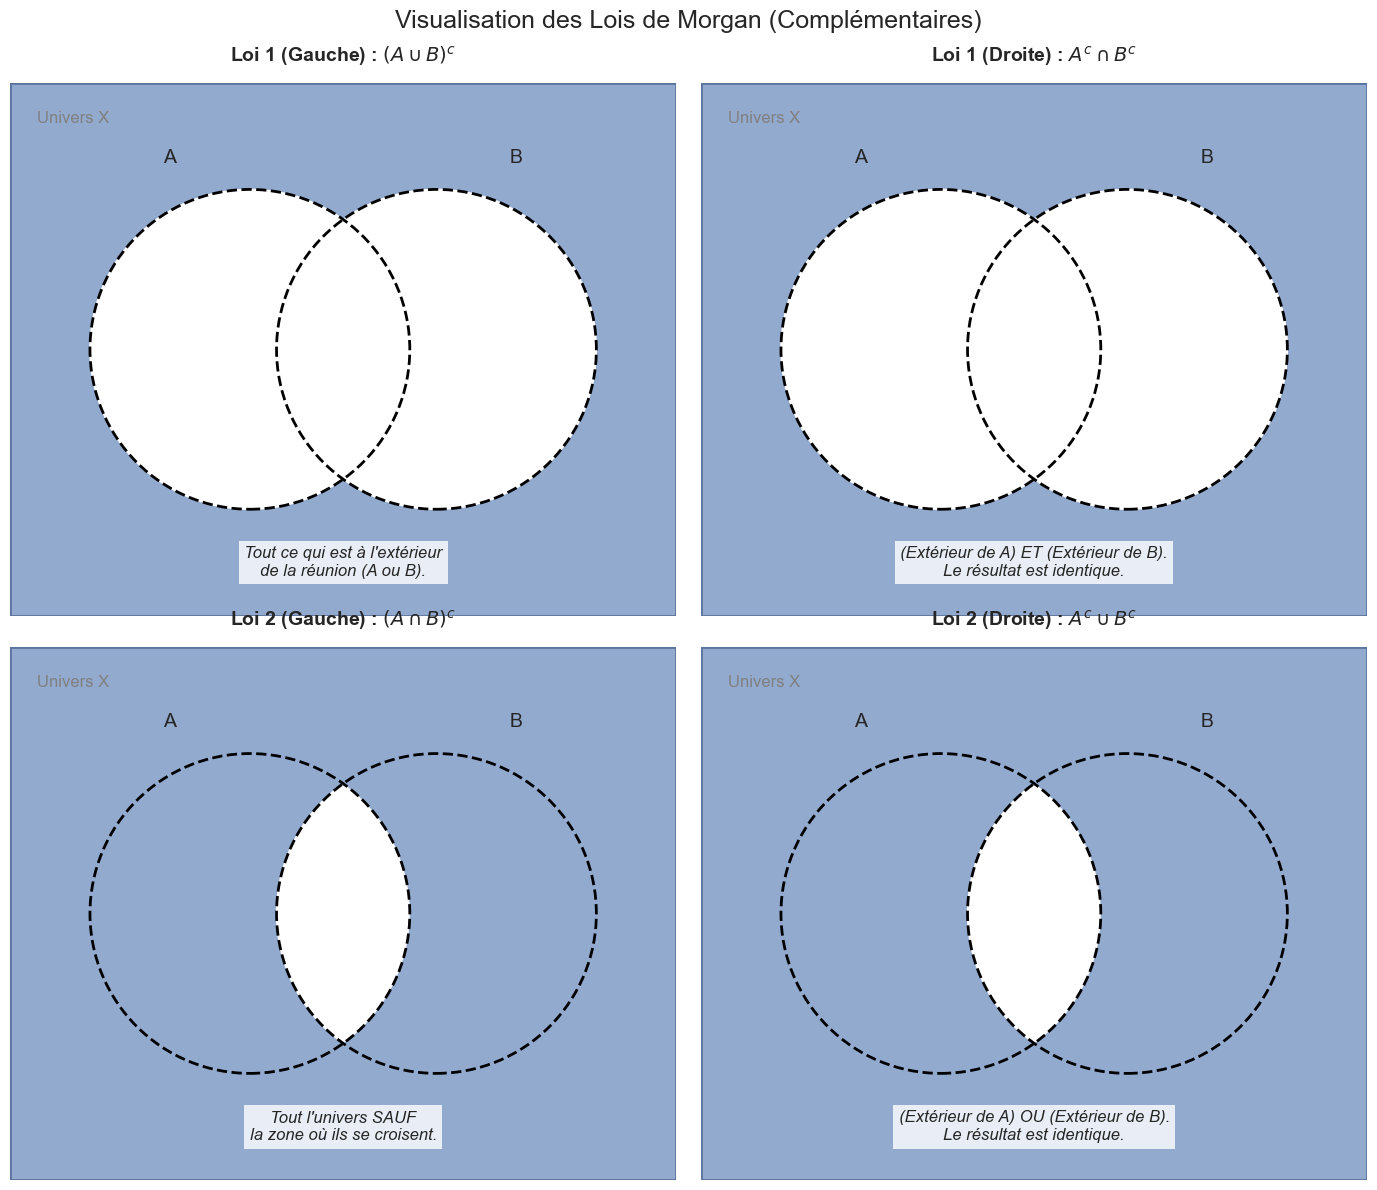

In [7]:
# Configuration du style Seaborn
sns.set_theme(style="white", palette="deep")
# On récupère une jolie couleur bleue de la palette Seaborn pour le résultat
highlight_color = sns.color_palette()[0]

def setup_venn_ax(ax, title):
    """Fonction utilitaire pour préparer les axes des diagrammes de Venn."""
    ax.set_aspect('equal')
    ax.set_xlim(-2.5, 2.5)
    ax.set_ylim(-2, 2)
    ax.axis('off') # Cacher les axes gradués
    ax.set_title(title, fontsize=14, fontweight='bold', pad=15)

    # Dessiner le cadre de l'Univers (X)
    universe = Rectangle((-2.5, -2), 5, 4, fill=False, edgecolor='gray', linewidth=2)
    ax.add_patch(universe)
    ax.text(-2.3, 1.7, "Univers X", fontsize=12, color='gray')

def draw_outlines(ax, c_a, c_b, r):
    """Dessine juste les contours des ensembles A et B pour la clarté."""
    circA_outline = Circle(c_a, r, fill=False, edgecolor='black', linewidth=2, linestyle='--')
    circB_outline = Circle(c_b, r, fill=False, edgecolor='black', linewidth=2, linestyle='--')
    ax.add_patch(circA_outline)
    ax.add_patch(circB_outline)
    # Étiquettes
    ax.text(c_a[0]-r/2, c_a[1]+r+0.2, "A", fontsize=14, ha='center')
    ax.text(c_b[0]+r/2, c_b[1]+r+0.2, "B", fontsize=14, ha='center')

def visualize_de_morgan():
    fig, axes = plt.subplots(2, 2, figsize=(14, 12))
    # Paramètres géométriques des cercles
    radius = 1.2
    center_A = (-0.7, 0)
    center_B = (0.7, 0)

    # ==================================================================
    # LOI 1 : Le complémentaire de la Réunion (A U B)^c = A^c n B^c
    # "Ni A, Ni B"
    # ==================================================================

    # --- GAUCHE : (A U B)^c ---
    ax1 = axes[0, 0]
    setup_venn_ax(ax1, r"Loi 1 (Gauche) : $(A \cup B)^c$")

    # 1. Fond : On remplit l'univers avec la couleur du résultat
    bg = Rectangle((-2.5, -2), 5, 4, color=highlight_color, alpha=0.6)
    ax1.add_patch(bg)

    # 2. Masque : On "efface" A et B en blanc car ils ne sont pas dans le résultat
    maskA = Circle(center_A, radius, color='white')
    maskB = Circle(center_B, radius, color='white')
    ax1.add_patch(maskA)
    ax1.add_patch(maskB)

    # 3. Contours et texte explicatif
    draw_outlines(ax1, center_A, center_B, radius)
    ax1.text(0, -1.7, "Tout ce qui est à l'extérieur\nde la réunion (A ou B).",
             ha='center', style='italic',bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

    # --- DROITE : A^c n B^c ---
    ax2 = axes[0, 1]
    setup_venn_ax(ax2, r"Loi 1 (Droite) : $A^c \cap B^c$")

    # C'est visuellement le même résultat. On utilise la même technique de masque.
    bg = Rectangle((-2.5, -2), 5, 4, color=highlight_color, alpha=0.6)
    ax2.add_patch(bg)
    maskA = Circle(center_A, radius, color='white')
    maskB = Circle(center_B, radius, color='white')
    ax2.add_patch(maskA)
    ax2.add_patch(maskB)

    draw_outlines(ax2, center_A, center_B, radius)
    ax2.text(0, -1.7, "(Extérieur de A) ET (Extérieur de B).\nLe résultat est identique.",
             ha='center', style='italic',bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

    # ==================================================================
    # LOI 2 : Le complémentaire de l'Intersection (A n B)^c = A^c U B^c
    # "Pas les deux en même temps"
    # ==================================================================

    # --- GAUCHE : (A n B)^c ---
    ax3 = axes[1, 0]
    setup_venn_ax(ax3, r"Loi 2 (Gauche) : $(A \cap B)^c$")

    # 1. Fond : On remplit l'univers avec la couleur du résultat
    bg = Rectangle((-2.5, -2), 5, 4, color=highlight_color, alpha=0.6)
    ax3.add_patch(bg)

    # 2. Masque : On doit effacer SEULEMENT l'intersection (le milieu)
    # Astuce Matplotlib : On crée un cercle blanc pour B, et on le "clippe" (coupe) par A.
    # Seule la partie de B qui est aussi dans A sera dessinée en blanc.
    clip_path_A = Circle(center_A, radius, transform=ax3.transData)
    mask_intersection = Circle(center_B, radius, color='white')
    mask_intersection.set_clip_path(clip_path_A)
    ax3.add_patch(mask_intersection)

    draw_outlines(ax3, center_A, center_B, radius)
    ax3.text(0, -1.7, "Tout l'univers SAUF\nla zone où ils se croisent.",
             ha='center', style='italic',bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

    # --- DROITE : A^c U B^c ---
    ax4 = axes[1, 1]
    setup_venn_ax(ax4, r"Loi 2 (Droite) : $A^c \cup B^c$")

    # Pour visualiser l'union des complémentaires, on peut le voir additivement.
    # Remplir A^c en bleu. Remplir B^c en bleu.
    # Astuce : On remplit tout l'univers en bleu. Le seul endroit qui n'est ni A^c ni B^c, c'est l'intersection.
    # Donc visuellement, c'est exactement la même figure qu'à gauche.

    bg = Rectangle((-2.5, -2), 5, 4, color=highlight_color, alpha=0.6)
    ax4.add_patch(bg)

    # Masque de l'intersection (même technique)
    clip_path_A_2 = Circle(center_A, radius, transform=ax4.transData)
    mask_intersection_2 = Circle(center_B, radius, color='white')
    mask_intersection_2.set_clip_path(clip_path_A_2)
    ax4.add_patch(mask_intersection_2)

    draw_outlines(ax4, center_A, center_B, radius)
    ax4.text(0, -1.7, "(Extérieur de A) OU (Extérieur de B).\nLe résultat est identique.",
             ha='center', style='italic',bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

    # Titre global
    fig.suptitle("Visualisation des Lois de Morgan (Complémentaires)", fontsize=18, y=0.99)
    plt.tight_layout()
    plt.show()

visualize_de_morgan()